### Load packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Create dataset

In [2]:
import os

path = "train"
c=1
cc="abcdef"                          #abcdefghijklmnopqrstuvwxyz
classes={}
for i in cc:
    files = os.listdir(path)[:c]
    classes[i]=c
    c+=1
print(classes)
print(files)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}
['a', 'b', 'c', 'd', 'e', 'f']


In [6]:
import cv2

X = []
Y = []

for cl in classes:
    pth = path+"/"+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        X.append(img)
        Y.append(classes[cl])
print("dataset created successfully!")

dataset created successfully!


In [7]:
pd.Series(Y).value_counts()

3    1000
6    1000
2    1000
5    1000
1    1000
4    1000
dtype: int64

In [8]:
X[0].shape

(28, 28)

In [9]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>


### Analyze data

1


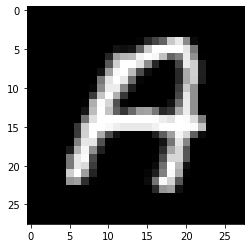

In [10]:
plt.imshow(X[100],cmap="gray")
print(Y[100])

In [11]:
X.shape

(6000, 28, 28)

### Prepare data

In [12]:
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(6000, 784)
(6000,)


In [13]:
28*28

784

In [14]:
print(X.shape)
print(X.ndim)
print(X_new.ndim)

(6000, 28, 28)
3
2


### Split data

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,Y, test_size=.20, random_state=10)

In [16]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(4800, 784) (4800,)
(1200, 784) (1200,)


### Feature Scaling

In [17]:
print(xtrain.max())
print(xtest.max())
x_train = xtrain/255
x_test = xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


### FEature Selection: PCA

In [18]:
from sklearn.decomposition import PCA

In [20]:
print(x_train.shape, x_test.shape)
pca = PCA(.98)
xtrain = pca.fit_transform(x_train)
xtest = pca.transform(x_test)
print(xtrain.shape, xtest.shape)
print(pca.n_components)
print(pca.n_features_)

(4800, 784) (1200, 784)
(4800, 181) (1200, 181)
0.98
784


In [67]:
ytest[:10]

array([2, 6, 2, 4, 6, 2, 1, 1, 2, 3])

### Train Model

In [21]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [22]:
tr_pred = log.predict(xtrain)
ts_pred = log.predict(xtest)

### Evaluation

In [23]:
print("Training Score", accuracy_score(ytrain,tr_pred))      
print("Testing Score", accuracy_score(ytest,ts_pred))        

Training Score 0.9860416666666667
Testing Score 0.9466666666666667


2


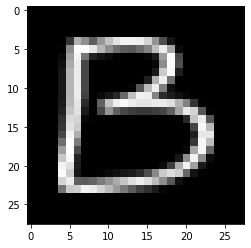

In [24]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
print(ytest[0])

### Test Model

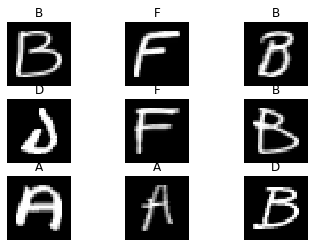

In [25]:
d=1
dd=cc.upper()
decode={}
for j in dd:
    decode[d]=j
    d+=1

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title(decode[ts_pred[i]])
    plt.axis('off')

In [26]:
np.where(ts_pred!=ytest)
d = pd.DataFrame({'Actual':ytest,'Prediction':ts_pred})
d[d['Actual']!=d['Prediction']]

,Actual,Prediction
8,2,4
23,5,6
30,5,4
51,2,3
81,1,2
...,...,...
1097,3,5
1098,2,1
1175,5,6
1180,2,4


### Test model on real data

In [27]:
#img = cv2.resize(cv2.imread('t.png',0), (28,28))
#plt.imshow(img,cmap='gray')

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-c2l3r8zm\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [28]:
img = pca.transform(img.reshape(1,-1)/255)

In [29]:
decode[log.predict(img)[0]]

'F'

### Save/Export model to a file

In [30]:
import pickle
filename = "modelc.pkl"
file = open(filename,"wb")
pickle.dump(log, file)
file.close()
fl = open('pcac.pkl','wb')
pickle.dump(pca,fl)
fl.close()

### Tkinter GUI

In [33]:
from tkinter import *
import tkinter as tk
import pickle
import cv2
from PIL import ImageTk,Image
import wikipedia
from tkinter import filedialog

In [37]:
root = Tk()
root.title("Alphabet Recognition")
rw = root.winfo_screenwidth()
rh = root.winfo_screenheight()
root.geometry("%dx%d+0+0"%(rw,rh))

left_frame=Frame(root,height=rh,bg="MediumPurple1",width=(rw/2),bd=2)
left_frame.pack(fill="both",side='left')
right_frame=Frame(root,height=rh,bg="MediumPurple2",width=(rw/2),bd=2)
right_frame.pack(fill="both",side='right')

lb = Label(left_frame,text="Upload Image:",font=("times new roman",26,"bold","italic"),bg="MediumPurple1",fg="black")
lb.place(x=80,y=100)
x = ""
def browse():
    global x
    x = filedialog.askopenfilename(filetype=(("png","*.png"),("jpeg","*.jpg")))
    img = Image.open(x)
    img = img.resize((250,250))
    im = ImageTk.PhotoImage(img)
    lb = Label(left_frame,image=im)
    lb.image = im
    lb.place(x=250,y=250)
btn = Button(left_frame,width=10,text="Browse",font=("times new roman",20),bg="black",activebackground="gray80",fg="white",command=browse)
btn.place(x=380,y=100)

lb = Label(right_frame,text="Predict Image:",font=("times new roman",26,"bold","italic"),bg="MediumPurple2",fg="black")
lb.place(x=80,y=100)

def predict():
    lb = Label(right_frame,text="Prediction:",bg="MediumPurple2",fg="black",font=("times new roman",26,"bold","italic"))
    lb.place(x=80,y=210)

    f = open("modelc.pkl",'rb')
    model = pickle.load(f)
    pca = pickle.load(open('pcac.pkl','rb'))
    im=cv2.imread(x,2)
    tst = pca.transform(cv2.resize(im, (28,28)).reshape(1,-1)/255)
    prediction = decode[model.predict(tst)[0]]
    lb1=tk.Label(right_frame,text=prediction,bg="MediumPurple2",fg="black",font=("Garamond",40))
    lb1.place(x=410,y=210)
    details = wikipedia.summary(prediction)    
    lb2 = tk.Text(right_frame,font=("times new roman",14),fg="black",bg="MediumPurple2")
    lb2.place(x=20,y=280)
    
    # lb2 = tk.Text(right_frame,font=("times new roman",22),fg="black",bg="MediumPurple2")
    # lb2.place(x=60,y=270)
    try:
        page = wikipedia.page(prediction)
        lb2.insert(tk.END, page.summary)
        lb2.configure(state='disabled')
    except:
        pass
    
btn = Button(right_frame,width=10,text="Predict",font=("times new roman",20),bg="black",activebackground="gray80",fg="white",command=predict)
btn.place(x=380,y=100)
root.mainloop()